<a href="https://colab.research.google.com/github/mselmasry/Project1_SalesPrediction/blob/main/SalesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

## 1. Part 1
### Importing Libraries and Setting Data Location

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import numpy as np

filename =  'https://raw.githubusercontent.com/mselmasry/DojoDataSets/main/sales_predictions.csv'

### Reading Data into DataFrame & Displaying head

In [2]:
df = pd.read_csv(filename)

#Copying df to run SimpleImputer method and compare fill outcome
df_base = pd.read_csv(filename)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<p>Here is the Data Dictionary for this dataset:</p>

<table><tbody><tr><td><strong>Variable&nbsp;Name</strong></td><td><strong>Description</strong></td></tr><tr><td>Item_Identifier</td><td>Unique product ID</td></tr><tr><td>Item_Weight</td><td>Weight of product</td></tr><tr><td>Item_Fat_Content</td><td>Whether the product is low fat or regular</td></tr><tr><td>Item_Visibility</td><td>The percentage of total display area of all products in a store allocated to the particular product</td></tr><tr><td>Item_Type</td><td>The category to which the product belongs</td></tr><tr><td>Item_MRP</td><td>Maximum Retail Price (list price) of the product</td></tr><tr><td>Outlet_Identifier</td><td>Unique store ID</td></tr><tr><td>Outlet_Establishment_Year</td><td>The year in which store was established</td></tr><tr><td>Outlet_Size</td><td>The size of the store in terms of ground area covered</td></tr><tr><td>Outlet_Location_Type</td><td>The type of area in which the store is located</td></tr><tr><td>Outlet_Type</td><td>Whether the outlet is a grocery store or some sort of supermarket</td></tr><tr><td>Item_Outlet_Sales</td><td>Sales of the product in the particular store. This is the target variable to be predicted.
<a href="https://github.com/ShauryaBhandari/Bigmart-Sales-Prediction#why-does-the-the-problem-need-to-be-solved" id="user-content-why-does-the-the-problem-need-to-be-solved" class="anchor" aria-hidden="true" target="_blank"></a></td></tr></tbody></table>

## Part 2

### 1. How many rows and columns?

In [3]:
print(df.shape)
print(f"Number of Rows is: {len(df)}")
print(f"Number of Columns is: {len(df.columns)}")

(8523, 12)
Number of Rows is: 8523
Number of Columns is: 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 2. What are the datatypes of each variable?

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3. Are there duplicates? If so, drop any duplicates

In [6]:
df.duplicated().any()

False

### 4. Identify missing values

#### Which Columns ?

In [7]:
df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

#### How many records ?

In [8]:
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


#### Show Records with Null Values

In [9]:
missingItemWeight = df[df['Item_Weight'].isna()]
missingOutletSize = df[df['Outlet_Size'].isna()]
print(f'Number of records missing Outlet_Size is: {len(missingOutletSize)}')
print(f'Number of records missing Item_Weight is: {len(missingItemWeight)}')

Number of records missing Outlet_Size is: 2410
Number of records missing Item_Weight is: 1463


In [10]:
missingOutletSize

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [11]:
missingItemWeight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


### 5. Decide on how to address the missing values and do it! (explain your choice)

#### a. Outlet_Size Analysis & Correction

##### Checking if missing value can be inferred from other records

In [12]:
df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier
Tier 1                Grocery Store      Small        OUT019               1.796941e+05
                      Supermarket Type1  Medium       OUT049               2.183970e+06
                                         Small        OUT046               2.118395e+06
Tier 2                Supermarket Type1  Small        OUT035               2.268123e+06
Tier 3                Supermarket Type1  High         OUT013               2.142664e+06
                      Supermarket Type2  Medium       OUT018               1.851823e+06
                      Supermarket Type3  Medium       OUT027               3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [13]:
df[df['Outlet_Size'].isna()].groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Identifier
Tier 2                Supermarket Type1  OUT017               2.167465e+06
                                         OUT045               2.036725e+06
Tier 3                Grocery Store      OUT010               1.883402e+05
Name: Item_Outlet_Sales, dtype: float64

###### Filling values for Outlet_Size

In [14]:
#Since all Outlets of Tier 2 & Outlet_Type Supermarket Type1 have an Outlet_Size of Small,
#Filling Outlet_Size values for OUT045 & OUT017 with inferred size Small
#Total Item_Outlet_Sales does not seem to be correlated to Outlet_Size alone for Tier 1
#For Tier 3 it seems related to Size and thus OUT010 could consequently be of size Medium


outletIDFilter1 = df['Outlet_Identifier'] == 'OUT045'
outletIDFilter2 = df['Outlet_Identifier'] == 'OUT017'
outletIDFilter3 = df['Outlet_Identifier'] == 'OUT010'
df.loc[outletIDFilter1 | outletIDFilter2, 'Outlet_Size'] = 'Small'
df.loc[outletIDFilter3,'Outlet_Size'] = 'Medium'

###### Verifying Outlet_Size for OUT017 & OUT045 are filled

In [15]:
df['Outlet_Size'].isna().sum()
#Remaining Null Values in Outlet_Size is 0, no more Null values

0

In [16]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Testing Simple Imputer


In [17]:
import sys
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_base)

filled_df = imputer.transform(df_base)
filled_df = pd.DataFrame(filled_df)
filled_df.columns = (['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'])
filled_df.head(10)
df_base['Outlet_Size'] = filled_df['Outlet_Size']
filled_df.groupby(['Outlet_Size','Outlet_Identifier'])['Outlet_Identifier'].count()

#Result of SimpleImputer using most_frequent strategy is different than inferred result
#SimpleImputer filled Size for all Outlet_Identifiers with Medium

#Will stick with Inferred values for Outlet_Size since SimpleImputer documentation
#mentions that the method does not take into consideration cross categorical corelations

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT010               555
             OUT017               926
             OUT018               928
             OUT027               935
             OUT045               929
             OUT049               930
Small        OUT019               528
             OUT035               930
             OUT046               930
Name: Outlet_Identifier, dtype: int64

In [18]:
df_base.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### b. Item_Weight Analysis & Correction

##### Calculating mean weight per item type

In [19]:
meanWeightPerType = df.groupby('Item_Type')['Item_Weight'].median()
meanWeightPerType = pd.DataFrame(meanWeightPerType.rename_axis('Item_Type').reset_index())
meanWeightPerType.columns=['Item_Type','Mean_Weight']

In [20]:
#Validating the results match the count returned by .info() 
print(f"\n Number of records with Null Item_Weight: {len(missingItemWeight)}")


 Number of records with Null Item_Weight: 1463


##### Calculating total & null counts per item type and percentage missing

In [21]:
countByType = pd.DataFrame(df[['Item_Type']].value_counts().rename_axis('Item_Type').reset_index(name='Count'))

naFilter = df['Item_Weight'].isna()

onlyNa = df[naFilter]
onlyNaCount = pd.DataFrame(onlyNa[['Item_Type']].value_counts().rename_axis('Item_Type').reset_index(name='Count'))
onlyNaCount

itemTypeData = pd.concat([countByType, onlyNaCount['Count'], meanWeightPerType['Mean_Weight']],axis=1)
itemTypeData.columns=['Item_Type','Total_Count','Count_Missing','Mean_Weight']

itemTypeData['Percent_Missing'] = itemTypeData['Count_Missing']/itemTypeData['Total_Count'] * 100
itemTypeData

,Item_Type,Total_Count,Count_Missing,Mean_Weight,Percent_Missing
0,Fruits and Vegetables,1232,213,11.650,17.288961
1,Snack Foods,1200,212,10.600,17.666667
2,Household,910,151,10.695,16.593407
3,Frozen Foods,856,138,12.150,16.121495
4,Dairy,682,116,13.350,17.008798
5,Canned,649,112,12.850,17.257319
6,Baking Goods,648,110,13.100,16.975309
7,Health and Hygiene,520,90,10.100,17.307692
8,Soft Drinks,445,88,12.150,19.775281
9,Meat,425,71,13.150,16.705882


##### Summary Data for Item_Type Snack Foods

In [22]:
oneTypeSummary = df[df['Item_Type']=='Household']
oneTypeSummary.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,759.000000,910.000000,910.000000,910.000000,910.000000
mean,13.384736,0.061322,149.424753,1997.784615,2258.784300
std,4.998845,0.052092,62.394009,8.297533,1692.245757
min,5.030000,0.000000,32.455800,1985.000000,33.290000
25%,8.695000,0.024718,107.762200,1987.000000,853.389150
50%,13.150000,0.044997,153.318200,1999.000000,1981.420800
75%,18.350000,0.090561,191.599750,2004.000000,3236.786700
max,21.250000,0.325781,264.791000,2009.000000,13086.964800


##### Using SimpleImputer to fill Item_Weight Null values using most_frequent strategy

In [23]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_base)

filled_df = imputer.transform(df_base)
filled_df = pd.DataFrame(filled_df)
filled_df.columns = (['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'])

df_base['Item_Weight'] = filled_df['Item_Weight']
df_base['Item_Weight'].isna().sum()

0

In [24]:
#Copying Item_Weight to main DataFrame (df) from Testing DataFrame (df_base)
#Since data observation and analysis did not yield any better results
df['Item_Weight'] = df_base['Item_Weight']

### 6. Confirm that there are no missing values after addressing them

In [25]:
df.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

### 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

#### Check and Fix Item_Fat_Conetnets field

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Checking Outlet_Location_Type, Outlet_Type, Outlet_Establishment_Year

In [28]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [30]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [31]:
df2 = df
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


## 3. Part 3

In [32]:
#Imports

import seaborn as sns
import matplotlib.pyplot as plt

### Correlation Heatmap

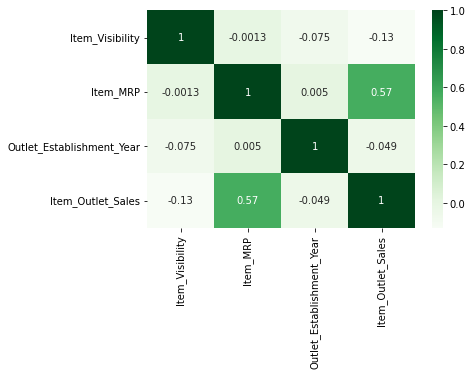

In [33]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens', annot=True)

### Histograms

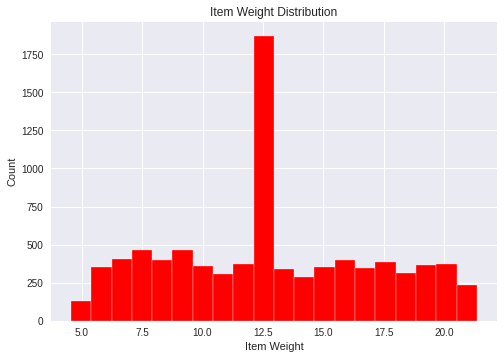

In [34]:
plt.style.use('seaborn')
plt.title("Item Weight Distribution")
plt.ylabel('Count')
plt.xlabel('Item Weight')
df['Item_Weight'].hist(bins=20,color='r', edgecolor='white');

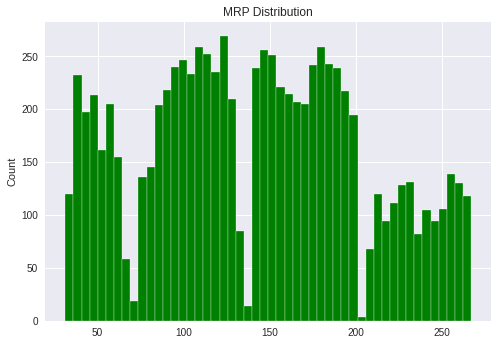

In [35]:
plt.style.use('seaborn')
plt.title("MRP Distribution")
plt.ylabel('Count')
df['Item_MRP'].hist(bins=50,color='g',edgecolor='white');

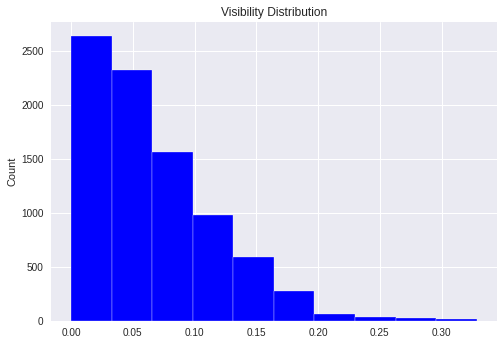

In [36]:
plt.style.use('seaborn')
plt.title("Visibility Distribution")
plt.ylabel('Count')
df['Item_Visibility'].hist(bins=10,color='b',edgecolor='white');

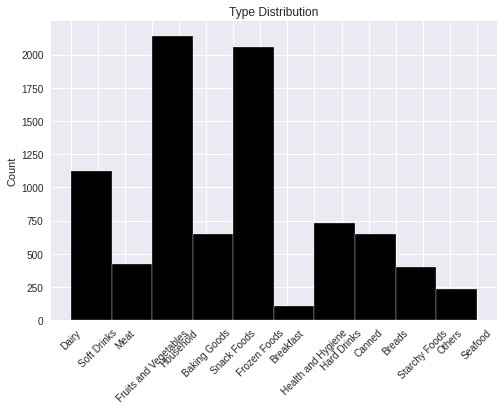

In [37]:
plt.style.use('seaborn')
plt.title("Type Distribution")
plt.ylabel('Count')
plt.xticks(rotation=45)
df['Item_Type'].hist(color='k',edgecolor='white');

### Boxplots

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


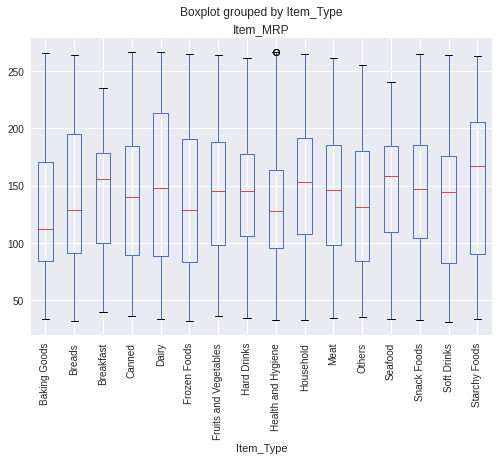

In [38]:
df.boxplot(column='Item_MRP', by='Item_Type',rot=90);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


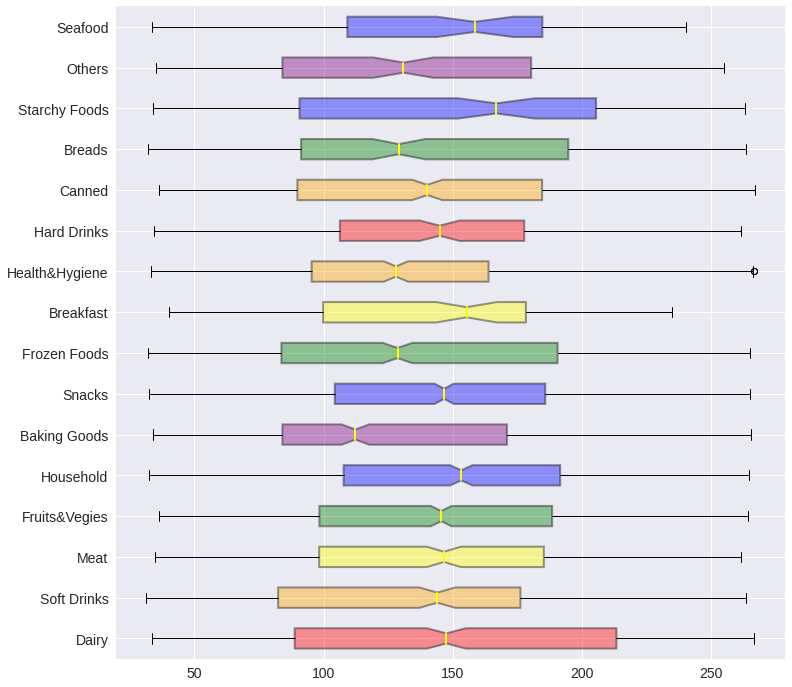

In [39]:
#Item MRP by Types Summaries
dairyMRP = df.loc[df['Item_Type'] == 'Dairy','Item_MRP']
softDrinksMRP = df.loc[df['Item_Type'] == 'Soft Drinks','Item_MRP']
meatMRP = df.loc[df['Item_Type'] == 'Meat','Item_MRP']
fruitsVegMRP = df.loc[df['Item_Type'] == 'Fruits and Vegetables','Item_MRP']
householdMRP = df.loc[df['Item_Type'] == 'Household','Item_MRP']
bakingGoodsMRP = df.loc[df['Item_Type'] == 'Baking Goods','Item_MRP']
snackMRP = df.loc[df['Item_Type'] == 'Snack Foods','Item_MRP']
frozenMRP = df.loc[df['Item_Type'] == 'Frozen Foods','Item_MRP']
breakfastMRP = df.loc[df['Item_Type'] == 'Breakfast','Item_MRP']
HnHMRP = df.loc[df['Item_Type'] == 'Health and Hygiene','Item_MRP']
hardDrinksMRP = df.loc[df['Item_Type'] == 'Hard Drinks','Item_MRP']
cannedMRP = df.loc[df['Item_Type'] == 'Canned','Item_MRP']
breadsMRP = df.loc[df['Item_Type'] == 'Breads','Item_MRP']
starchyMRP = df.loc[df['Item_Type'] == 'Starchy Foods','Item_MRP']
othersMRP = df.loc[df['Item_Type'] == 'Others','Item_MRP']
seafoodMRP = df.loc[df['Item_Type'] == 'Seafood','Item_MRP']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,12));
boxplots = axes.boxplot([dairyMRP,softDrinksMRP,meatMRP,fruitsVegMRP,
              householdMRP,bakingGoodsMRP,snackMRP,frozenMRP,
              breakfastMRP,HnHMRP,hardDrinksMRP,cannedMRP,breadsMRP,
              starchyMRP,othersMRP,seafoodMRP], 
              notch = True, labels = ['Dairy','Soft Drinks','Meat',
              'Fruits&Vegies','Household','Baking Goods','Snacks','Frozen Foods',
              'Breakfast','Health&Hygiene','Hard Drinks','Canned','Breads',
              'Starchy Foods','Others','Seafood'], patch_artist=True,
              medianprops = dict(linestyle ='-', linewidth=2,color='Yellow'),
              boxprops=dict(linestyle='--',linewidth=2,color='Black',facecolor='blue',alpha=.4), vert=False);
#plt.xticks(rotation=45);
dairyplot = boxplots['boxes'][0];
dairyplot.set_facecolor('red');
softDrinksPlot = boxplots['boxes'][1];
softDrinksPlot.set_facecolor('orange');
meatPlot = boxplots['boxes'][2];
meatPlot.set_facecolor('Yellow');
fruitsVegPlot = boxplots['boxes'][3];
fruitsVegPlot.set_facecolor('green');
bakingGoodsPlot = boxplots['boxes'][4];
bakingGoodsPlot.set_facecolor('blue');
snacksPlot = boxplots['boxes'][5];
snacksPlot.set_facecolor('purple');
frozenPlot = boxplots['boxes'][6];
frozenPlot.set_facecolor('blue');
breakfastPlot = boxplots['boxes'][7];
breakfastPlot.set_facecolor('green');
HnHPlot = boxplots['boxes'][8];
HnHPlot.set_facecolor('Yellow');
hardDrinksPlot = boxplots['boxes'][9];
hardDrinksPlot.set_facecolor('orange');
cannedPlot = boxplots['boxes'][10];
cannedPlot.set_facecolor('red');
breadsPlot = boxplots['boxes'][11];
breadsPlot.set_facecolor('orange');
starchyPlot = boxplots['boxes'][12];
starchyPlot.set_facecolor('green');
otherPlot = boxplots['boxes'][13];
otherPlot.set_facecolor('blue');
seafoodPlot = boxplots['boxes'][14];
seafoodPlot.set_facecolor('purple');
plt.style.use('seaborn');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


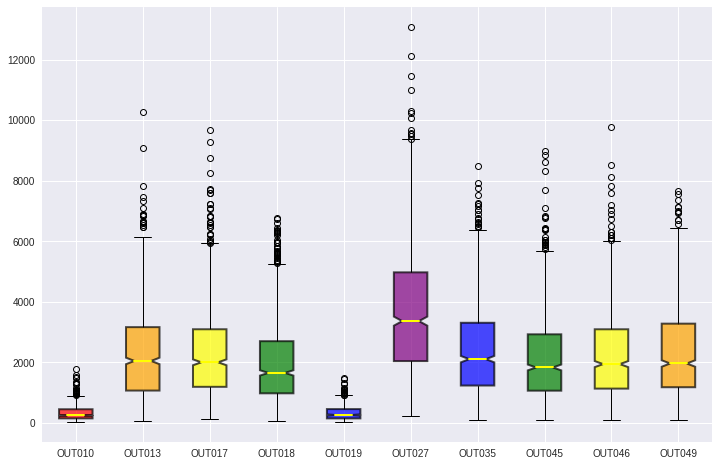

In [40]:
#Total Sales by Outlet Summaries
out010 = df.loc[df['Outlet_Identifier']=='OUT010','Item_Outlet_Sales']
out013 = df.loc[df['Outlet_Identifier']=='OUT013','Item_Outlet_Sales']
out017 = df.loc[df['Outlet_Identifier']=='OUT017','Item_Outlet_Sales']
out018 = df.loc[df['Outlet_Identifier']=='OUT018','Item_Outlet_Sales']
out019 = df.loc[df['Outlet_Identifier']=='OUT019','Item_Outlet_Sales']
out027 = df.loc[df['Outlet_Identifier']=='OUT027','Item_Outlet_Sales']
out035 = df.loc[df['Outlet_Identifier']=='OUT035','Item_Outlet_Sales']
out045 = df.loc[df['Outlet_Identifier']=='OUT045','Item_Outlet_Sales']
out046 = df.loc[df['Outlet_Identifier']=='OUT046','Item_Outlet_Sales']
out049 = df.loc[df['Outlet_Identifier']=='OUT049','Item_Outlet_Sales']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,8))
boxplots = axes.boxplot([out010,out013,out017,out018,out019,out027,out035,out045,out046,out049], 
              notch = True, labels = ['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049'], patch_artist=True,
              medianprops = dict(linestyle ='-', linewidth=2,color='Yellow'),
              boxprops=dict(linestyle='--',linewidth=2,color='Black',facecolor='blue',alpha=.7));
#plt.xticks(rotation=45);
dairyplot = boxplots['boxes'][0]
dairyplot.set_facecolor('red')
softDrinksPlot = boxplots['boxes'][1]
softDrinksPlot.set_facecolor('orange')
meatPlot = boxplots['boxes'][2]
meatPlot.set_facecolor('Yellow')
fruitsVegPlot = boxplots['boxes'][3]
fruitsVegPlot.set_facecolor('green')
bakingGoodsPlot = boxplots['boxes'][4]
bakingGoodsPlot.set_facecolor('blue')
snacksPlot = boxplots['boxes'][5]
snacksPlot.set_facecolor('purple')
frozenPlot = boxplots['boxes'][6]
frozenPlot.set_facecolor('blue')
breakfastPlot = boxplots['boxes'][7]
breakfastPlot.set_facecolor('green')
HnHPlot = boxplots['boxes'][8]
HnHPlot.set_facecolor('Yellow')
hardDrinksPlot = boxplots['boxes'][9]
hardDrinksPlot.set_facecolor('orange');


## 4. Part 4

In [41]:
pd.options.display.float_format = '{:.5f}'.format
outletTotalSales = df[['Item_Outlet_Sales']].groupby([df['Outlet_Identifier']]).sum()
outletTotalSales.sort_values(by='Item_Outlet_Sales',inplace=True)

In [42]:
totalSalesByType = df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum().reset_index()
totalSalesByType.sort_values(by='Item_Outlet_Sales',inplace=True,ascending=False)

In [43]:
avgMRPByType = df.groupby(df['Item_Type'])['Item_MRP'].mean().reset_index(name='Avg_MRP')
avgMRPByType.sort_values(by='Item_Type',inplace=True,ascending=False)

In [44]:
noOutletID = df.drop(columns='Outlet_Identifier')
countByType = noOutletID.groupby(noOutletID['Item_Type'])['Item_MRP'].nunique().reset_index(name='Item_Count')
countByType.sort_values(by='Item_Count',inplace=True,ascending=False);

### Item Types that have higher Counts (more variety and options) have higher sales


 Item Types that have higher Counts (more variety and options) have higher sales.



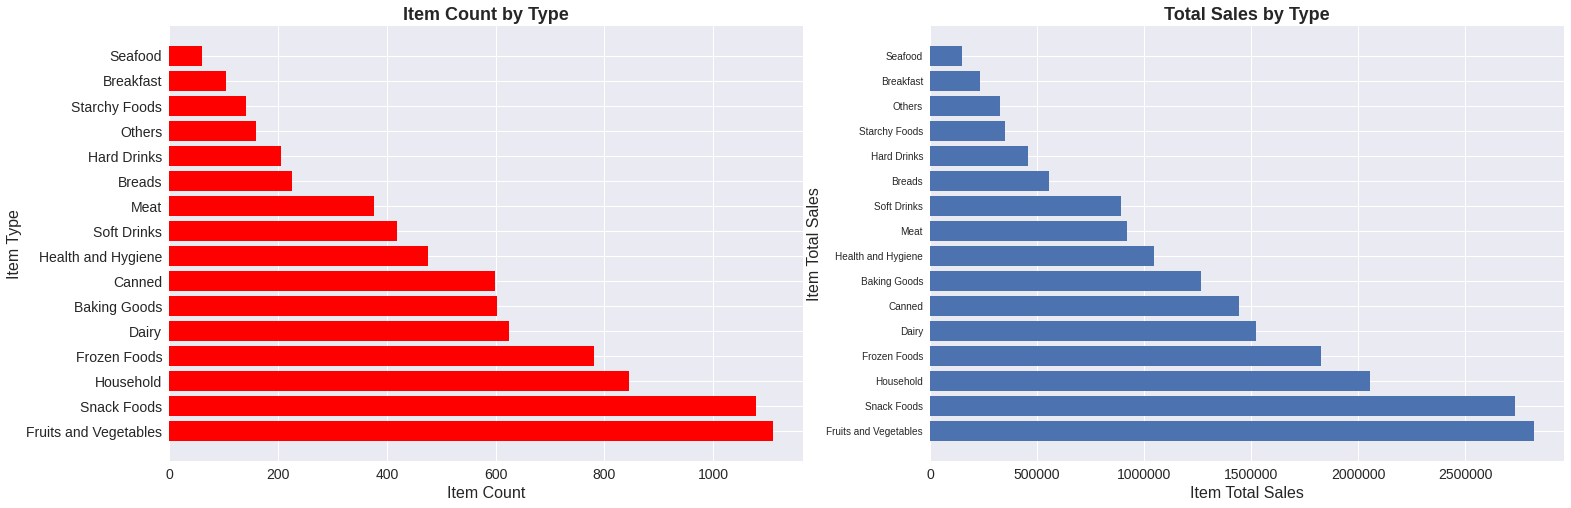

In [45]:
# Count & Total Sales per Item Type
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.barh(countByType['Item_Type'],countByType['Item_Count'],color='red')
plt.xlabel('Item Count',fontsize=16)
plt.ylabel('Item Type',fontsize=16)
plt.title('Item Count by Type',fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
plt.barh(totalSalesByType['Item_Type'],totalSalesByType['Item_Outlet_Sales'])
plt.xlabel('Item Total Sales',fontsize=16)
plt.xticks(fontsize=14)
plt.ticklabel_format(style='plain',axis='x')
plt.xticks(fontsize=14)
plt.ylabel('Item Total Sales',fontsize=16)
plt.title('Total Sales by Type',fontsize=18,fontweight='bold')

print('\n Item Types that have higher Counts (more variety and options) have higher sales.\n')
plt.show()

### Total Sales of Small Outlets is Higher that Total Sales for High & Medium Size Outlets

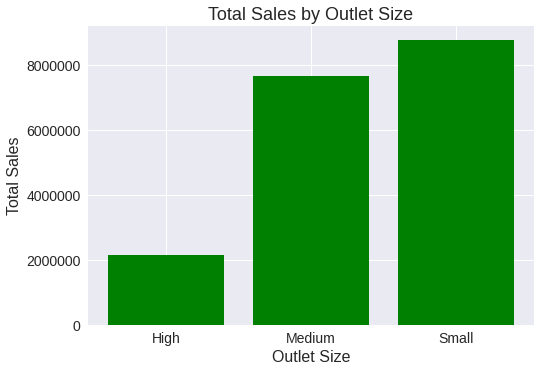

In [46]:
salesBySize = df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()
salesBySize.sort_values('Item_Outlet_Sales')
plt.bar(salesBySize['Outlet_Size'],salesBySize['Item_Outlet_Sales'], color='green')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Outlet Size' , fontsize = 16);
plt.ylabel('Total Sales' , fontsize = 16);
plt.title('Total Sales by Outlet Size', fontsize=18);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

   Outlet_Establishment_Year Outlet_Size  Item_Outlet_Sales
0                       1985      Medium      3453926.05140
1                       1985       Small       179694.09360
2                       1987        High      2142663.57820
3                       1997       Small      2118395.16820
4                       1998      Medium       188340.17240
5                       1999      Medium      2183969.81020
6                       2002       Small      2036725.47700
7                       2004       Small      2268122.93540
8                       2007       Small      2167465.29400
9                       2009      Medium      1851822.83000



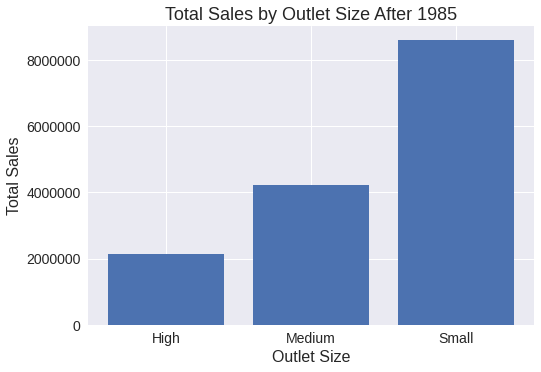

In [47]:
#Total Sales By Outlet Establishment Year
salesByEstYear = df.groupby(['Outlet_Establishment_Year','Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index()
print(salesByEstYear)
print()

#Since year 85 has a very high sales value that could skew the results
#Excluding it to compare Sales per Outlet Type

estYearFilter = salesByEstYear['Outlet_Establishment_Year'] > 1985
salesByEstYear = salesByEstYear.loc[estYearFilter,:];
salesByEstYearAfter85 = salesByEstYear.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index();
plt.bar(salesByEstYearAfter85['Outlet_Size'],salesByEstYearAfter85['Item_Outlet_Sales']);
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Outlet Size' , fontsize = 16);
plt.ylabel('Total Sales' , fontsize = 16);
plt.title('Total Sales by Outlet Size After 1985', fontsize=18);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

## 5. Part 5
Leaniar Regression
Target: Item_Outlet_Sales

<p>Here is the Data Dictionary for this dataset:</p>

<table>
<tbody>
<tr><td>
<strong>Variable&nbsp;Name</strong>
</td>
<td>
<strong>Description</strong>
</td></tr>
<tr><td>Item_Identifier</td>
<td>Unique product ID</td></tr>
<tr><td>Item_Weight</td>
<td>Weight of product</td></tr>
<tr><td>Item_Fat_Content</td>
<td>Whether the product is low fat or regular</td></tr>
<tr><td>Item_Visibility</td>
<td>The percentage of total display area of all products in a store allocated to the particular product</td></tr>
<tr><td>Item_Type</td>
<td>The category to which the product belongs</td></tr>
<tr><td>Item_MRP</td>
<td>Maximum Retail Price (list price) of the product</td></tr>
<tr><td>Outlet_Identifier</td>
<td>Unique store ID</td></tr>
<tr><td>Outlet_Establishment_Year</td>
<td>The year in which store was established</td></tr>
<tr><td>Outlet_Size</td>
<td>The size of the store in terms of ground area covered</td></tr>
<tr><td>Outlet_Location_Type</td>
<td>The type of area in which the store is located</td></tr>
<tr><td>Outlet_Type</td>
<td>Whether the outlet is a grocery store or some sort of supermarket</td></tr>
<tr><td>Item_Outlet_Sales</td>
<td>Sales of the product in the particular store. This is the target variable to be predicted.
<a href="https://github.com/ShauryaBhandari/Bigmart-Sales-Prediction#why-does-the-the-problem-need-to-be-solved" id="user-content-why-does-the-the-problem-need-to-be-solved" class="anchor" aria-hidden="true" target="_blank">
</a>
</td></tr></tbody></table>

In [48]:
#ML Imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.01605,Dairy,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800
1,DRC01,5.92000,Regular,0.01928,Soft Drinks,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280
2,FDN15,17.50000,Low Fat,0.01676,Meat,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000
3,FDX07,19.20000,Regular,0.00000,Fruits and Vegetables,182.09500,OUT010,1998,Medium,Tier 3,Grocery Store,732.38000
4,NCD19,8.93000,Low Fat,0.00000,Household,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520


#### Processing Data for ML

Need to process 
1. Item_Fat_Content
2. Item_Type
3. Outlet_Identifier
4. Outlet_Size
5. Outlet_Location_Type
6. Outlet_Type

##### Item_Fat_Content (Get Dummies)

In [50]:
ML_df = pd.get_dummies(df,columns=['Item_Fat_Content'], drop_first=True)
#Regular: 1, Low Fat: 0

##### Item_Type (Dict Map)

In [51]:
itemTypes = ML_df['Item_Type'].value_counts().reset_index(name='Type_Count')

In [52]:
itemTypes.columns = ['Item_Type','Type_Count']
itemTypes = itemTypes[['Item_Type']]
itemTypes

,Item_Type
0,Fruits and Vegetables
1,Snack Foods
2,Household
3,Frozen Foods
4,Dairy
5,Canned
6,Baking Goods
7,Health and Hygiene
8,Soft Drinks
9,Meat


In [53]:
Item_Type_Dict = {
    itemTypes['Item_Type'][0] : 0,
    itemTypes['Item_Type'][1] : 1,
    itemTypes['Item_Type'][2] : 2,
    itemTypes['Item_Type'][3] : 3,
    itemTypes['Item_Type'][4] : 4,
    itemTypes['Item_Type'][5] : 5,
    itemTypes['Item_Type'][6] : 6,
    itemTypes['Item_Type'][7] : 7,
    itemTypes['Item_Type'][8] : 8,
    itemTypes['Item_Type'][9] : 9,
    itemTypes['Item_Type'][10] : 10,
    itemTypes['Item_Type'][11] : 11,
    itemTypes['Item_Type'][12] : 12,
    itemTypes['Item_Type'][13] : 13,
    itemTypes['Item_Type'][14] : 14,
    itemTypes['Item_Type'][15] : 15
}

ML_df['Item_Type'] = ML_df['Item_Type'].map(Item_Type_Dict)
ML_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular
0,FDA15,9.30000,0.01605,4,249.80920,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.13800,0
1,DRC01,5.92000,0.01928,8,48.26920,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42280,1
2,FDN15,17.50000,0.01676,9,141.61800,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27000,0
3,FDX07,19.20000,0.00000,0,182.09500,OUT010,1998,Medium,Tier 3,Grocery Store,732.38000,1
4,NCD19,8.93000,0.00000,2,53.86140,OUT013,1987,High,Tier 3,Supermarket Type1,994.70520,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.86500,0.05678,1,214.52180,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38340,0
8519,FDS36,8.38000,0.04698,6,108.15700,OUT045,2002,Small,Tier 2,Supermarket Type1,549.28500,1
8520,NCJ29,10.60000,0.03519,7,85.12240,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11360,0
8521,FDN46,7.21000,0.14522,1,103.13320,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.59760,1


##### Outlet_Identifier (Dict Map)

In [54]:
outlets = ML_df['Outlet_Identifier'].value_counts().reset_index(name='Record_Count')
outlets.columns = ['Outlet_Identifier','Record_Count']
outlets = outlets[['Outlet_Identifier']]
outlets

,Outlet_Identifier
0,OUT027
1,OUT013
2,OUT046
3,OUT035
4,OUT049
5,OUT045
6,OUT018
7,OUT017
8,OUT010
9,OUT019


In [55]:
outletsDict = {
    outlets['Outlet_Identifier'][0] : 0,
    outlets['Outlet_Identifier'][1] : 1,
    outlets['Outlet_Identifier'][2] : 2,
    outlets['Outlet_Identifier'][3] : 3,
    outlets['Outlet_Identifier'][4] : 4,
    outlets['Outlet_Identifier'][5] : 5,
    outlets['Outlet_Identifier'][6] : 6,
    outlets['Outlet_Identifier'][7] : 7,
    outlets['Outlet_Identifier'][8] : 8,
    outlets['Outlet_Identifier'][9] : 9
}

ML_df['Outlet_Identifier'] = ML_df['Outlet_Identifier'].map(outletsDict)
ML_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular
0,FDA15,9.30000,0.01605,4,249.80920,4,1999,Medium,Tier 1,Supermarket Type1,3735.13800,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,Medium,Tier 3,Supermarket Type2,443.42280,1
2,FDN15,17.50000,0.01676,9,141.61800,4,1999,Medium,Tier 1,Supermarket Type1,2097.27000,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,Medium,Tier 3,Grocery Store,732.38000,1
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,High,Tier 3,Supermarket Type1,994.70520,0


##### Outlet_Size (Get Dummies)

In [56]:
ML_df = pd.get_dummies(ML_df,columns=['Outlet_Size'],drop_first=True)
ML_df.head()
#Medium: 1 0
#Small: 0 1
#High: 0 0

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30000,0.01605,4,249.80920,4,1999,Tier 1,Supermarket Type1,3735.13800,0,1,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,Tier 3,Supermarket Type2,443.42280,1,1,0
2,FDN15,17.50000,0.01676,9,141.61800,4,1999,Tier 1,Supermarket Type1,2097.27000,0,1,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,Tier 3,Grocery Store,732.38000,1,1,0
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,Tier 3,Supermarket Type1,994.70520,0,0,0


##### Outlet_Location_Type (Get Dummies)

In [57]:
ML_df = pd.get_dummies(ML_df,columns=['Outlet_Location_Type'],drop_first=True)
ML_df
#Tier1 : 0 0
#Tier2 : 0 1
#Tier3 : 1 0

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30000,0.01605,4,249.80920,4,1999,Supermarket Type1,3735.13800,0,1,0,0,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,Supermarket Type2,443.42280,1,1,0,0,1
2,FDN15,17.50000,0.01676,9,141.61800,4,1999,Supermarket Type1,2097.27000,0,1,0,0,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,Grocery Store,732.38000,1,1,0,0,1
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,Supermarket Type1,994.70520,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.86500,0.05678,1,214.52180,1,1987,Supermarket Type1,2778.38340,0,0,0,0,1
8519,FDS36,8.38000,0.04698,6,108.15700,5,2002,Supermarket Type1,549.28500,1,0,1,1,0
8520,NCJ29,10.60000,0.03519,7,85.12240,3,2004,Supermarket Type1,1193.11360,0,0,1,1,0
8521,FDN46,7.21000,0.14522,1,103.13320,6,2009,Supermarket Type2,1845.59760,1,1,0,0,1


##### Outlet_Type (Get Dummies)

In [58]:
ML_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [59]:
ML_df = pd.get_dummies(ML_df,columns=['Outlet_Type'],drop_first=True)
ML_df
# Grocery Store:        0 0 0
# Supermarket Type 1:   1 0 0
# Supermarket Type 2:   0 1 0
# Supermarket Type 3:   0 1 1

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30000,0.01605,4,249.80920,4,1999,3735.13800,0,1,0,0,0,1,0,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,443.42280,1,1,0,0,1,0,1,0
2,FDN15,17.50000,0.01676,9,141.61800,4,1999,2097.27000,0,1,0,0,0,1,0,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,732.38000,1,1,0,0,1,0,0,0
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,994.70520,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.86500,0.05678,1,214.52180,1,1987,2778.38340,0,0,0,0,1,1,0,0
8519,FDS36,8.38000,0.04698,6,108.15700,5,2002,549.28500,1,0,1,1,0,1,0,0
8520,NCJ29,10.60000,0.03519,7,85.12240,3,2004,1193.11360,0,0,1,1,0,1,0,0
8521,FDN46,7.21000,0.14522,1,103.13320,6,2009,1845.59760,1,1,0,0,1,0,1,0


##### Identify Correlation

In [60]:
ML_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30000,0.01605,4,249.80920,4,1999,3735.13800,0,1,0,0,0,1,0,0
1,DRC01,5.92000,0.01928,8,48.26920,6,2009,443.42280,1,1,0,0,1,0,1,0
2,FDN15,17.50000,0.01676,9,141.61800,4,1999,2097.27000,0,1,0,0,0,1,0,0
3,FDX07,19.20000,0.00000,0,182.09500,8,1998,732.38000,1,1,0,0,1,0,0,0
4,NCD19,8.93000,0.00000,2,53.86140,1,1987,994.70520,0,0,0,0,1,1,0,0


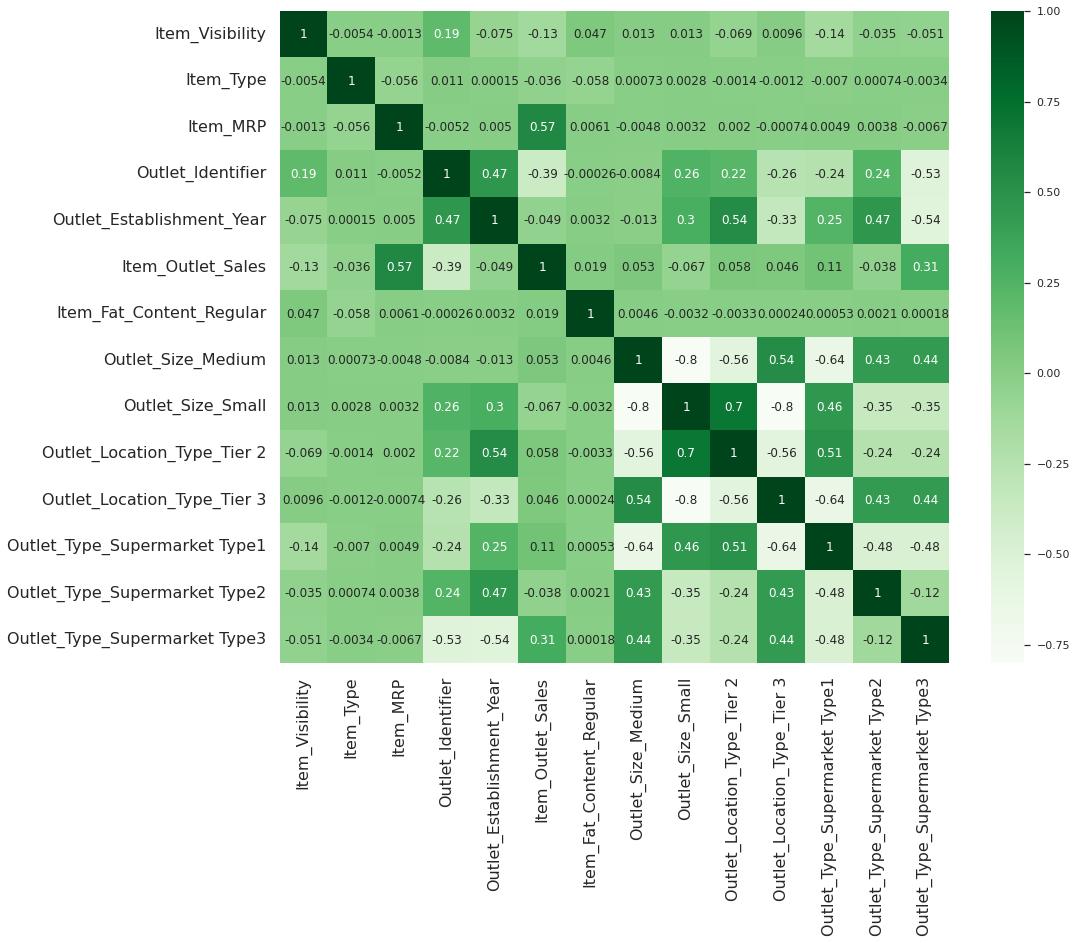

In [94]:
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(ML_df.corr(), cmap = 'Greens', annot=True);

Most Relevant Features are:
1- Item_MRP
2- Outlet_Size

#### Running Model

##### Preparing Features & Target Vector

In [62]:
#Checking Importance
model = LinearRegression()
y = ML_df['Item_Outlet_Sales']
X = ML_df.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
model.fit(X,y)
importance = model.coef_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: -0.58155
Feature: 1, Score: -291.83629
Feature: 2, Score: 0.97297
Feature: 3, Score: 15.56281
Feature: 4, Score: -51.47690
Feature: 5, Score: 54.93907
Feature: 6, Score: 52.23001
Feature: 7, Score: -1313.35138
Feature: 8, Score: -1404.36175
Feature: 9, Score: -187.98492
Feature: 10, Score: -875.10819
Feature: 11, Score: 868.48026
Feature: 12, Score: 922.99000
Feature: 13, Score: 3659.47598


In [63]:
y = ML_df['Item_Outlet_Sales']
X = ML_df.drop(columns=['Item_Outlet_Sales','Item_Identifier','Item_Visibility','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Item_Fat_Content_Regular','Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3'])

##### Creating Train/Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

##### Instantiating & Fitting Model

In [65]:
reg = LinearRegression();
reg.fit(X_train,y_train);

##### Evaluate Result with *R^2*

In [66]:
print(f"Train R^2 : {r2_score(y_train, reg.predict(X_train))}")
print(f"Test R^2 : {r2_score(y_test, reg.predict(X_test))}")

Train R^2 : 0.347708884931732
Test R^2 : 0.3491066818668337


##### Evaluate Result with *RMSE*

In [67]:
print(f"Train RMSE : {np.sqrt(mean_squared_error(y_train,reg.predict(X_train)))}")
print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test,reg.predict(X_test)))}")

Train RMSE : 1389.3979492934254
Test RMSE : 1340.0745805791994


## 6. Final

### a. Processing Data

Given the new learnings on OHE, Scaling as well as Different ML Algorithms, I am going to go back to the processing step and process the data using OHE and also scale any numerical data to check if
this has an impact on the algorithm scores

In [68]:
#Fixing Item_Weight and Train Test Splitting the Data

df2['Item_Weight'] = pd.to_numeric(df2['Item_Weight'])

X = df2.drop(columns=['Item_Outlet_Sales'])
y = df2['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [69]:
#Identifying Categroical Columns
X_train['Item_Fat_Content'].value_counts()

Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64

In [70]:
X_train['Item_Type'].value_counts()

Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64

In [71]:
X_train['Item_Identifier'].value_counts()
X_train.shape

(6392, 11)

In [72]:
# For Outlet Establishment Year & Outlet Size it's not yet clear to me what would be the best approach to processing them
#I am going to try first OHE all Categorical but not include Outlet Establishment Year first and treat it as numerical


ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

train_cat = X_train[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']]
test_cat = X_test[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']]

# train_cat = X_train.select_dtypes(include='object')
# test_cat = X_test.select_dtypes(include='object')

ohe.fit(train_cat)

train_cat_ohe = ohe.transform(train_cat)
test_cat_ohe = ohe.transform(test_cat)

cols = ohe.get_feature_names(train_cat.columns)

train_cat_ohe = pd.DataFrame(train_cat_ohe, columns=cols)
test_cat_ohe = pd.DataFrame(test_cat_ohe, columns=cols)


In [73]:
#Handling numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_num = X_train.select_dtypes(include='number')
test_num = X_test.select_dtypes(include='number')

train_num.drop(columns=['Outlet_Establishment_Year'])
test_num.drop(columns=['Outlet_Establishment_Year'])

scaler.fit(train_num)

train_num_scaled = scaler.transform(train_num)
test_num_scaled = scaler.transform(test_num)

train_num_scaled = pd.DataFrame(train_num_scaled, columns=train_num.columns)
test_num_scaled = pd.DataFrame(test_num_scaled, columns=train_num.columns)


In [74]:
X_train_processed = pd.concat([train_num_scaled, train_cat_ohe], axis = 1)
X_test_processed = pd.concat([test_num_scaled, test_cat_ohe], axis = 1)

X_train_processed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,0.84630,-0.71278,1.82811,1.32785,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,0.58599,-1.29105,0.60337,1.32785,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,-0.10029,1.81332,0.24454,0.13619,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3,-1.13563,-1.00493,-0.95259,0.73202,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,1.55625,-0.96548,-0.33646,0.49369,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.79959,4.30966,-0.04466,0.01702,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6388,0.66882,1.00863,-1.05891,1.08952,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
6389,1.14211,-0.92053,1.52303,0.49369,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
6390,1.79289,-0.22776,-0.38378,1.08952,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00

### b. Preparing & Applying ML Models

#### 1. Model Eval Function

In [75]:
def model_eval(modelName, isLR, model, X_tr, X_te, y_tr, y_te):
    
    y_pred = model.predict(X_te)

    train_mae = mean_absolute_error(y_tr, model.predict(X_tr))
    train_mse = mean_squared_error(y_tr, model.predict(X_tr))
    train_rmse = np.sqrt(train_mse)

    test_mae = mean_absolute_error(y_te, y_pred)
    test_mse = mean_squared_error(y_te, y_pred)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_tr, model.predict(X_tr))
    test_r2 = r2_score(y_te, model.predict(X_te))
    
    if (isLR):
        print(f'{modelName}:\n\n Train Results: \n  MAE: {train_mae} \n  MSE: {train_mse} \n  RMSE: {train_rmse} \n  R^2 Score: {train_r2}\n')
        print(f' Test Results: \n  MAE: {test_mae} \n  MSE: {test_mse} \n  RMSE: {test_rmse} \n  R^2 Score: {test_r2}')

    else:
        print(f'{modelName}: \n\n Train (R^2) : {model.score(X_tr, y_tr)}')
        print(f' Test  (R^2) : {model.score(X_te, y_te)}\n')

        print(f' Train RMSE : {train_rmse}')
        print(f' Test  RMSE : {test_rmse}')

def get_parameters(model):  
  print(f'\nParameters:\n')
  print(f' max_depth : {model.max_depth}')
  print(f' min_samples_split : {model.min_samples_split}')
  print(f' n_estimators : {model.n_estimators}')
  print(f' n_jobs : {model.n_jobs}')
  print(f' min_samples_leaf : {model.min_samples_leaf}')
  print(f' max_samples : {model.max_samples}')

#### 2. Baseline

In [76]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train_processed, y_train)

model_eval('MeanDummyRegressor', True, dummy, X_train_processed, X_test_processed, y_train, y_test)

MeanDummyRegressor:

 Train Results: 
  MAE: 1360.2184410159132 
  MSE: 2959455.7045265585 
  RMSE: 1720.306863477141 
  R^2 Score: 0.0

 Test Results: 
  MAE: 1326.121044678208 
  MSE: 2772144.4627103633 
  RMSE: 1664.9758144520788 
  R^2 Score: -0.004772483978719766


#### 3. Linear Regression

In [77]:
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

model_eval('StdLinearRegression',True, lr, X_train_processed, X_test_processed, y_train, y_test)

StdLinearRegression:

 Train Results: 
  MAE: 847.13267359199 
  MSE: 1297570.263563635 
  RMSE: 1139.109416853199 
  R^2 Score: 0.5615510441399849

 Test Results: 
  MAE: 804.139667010793 
  MSE: 1194373.5810789512 
  RMSE: 1092.8740005503614 
  R^2 Score: 0.5670955370464611


#### 4. Regression Tree

In [78]:
regtree = DecisionTreeRegressor(random_state=42)

regtree.fit(X_train_processed, y_train)

model_eval('StdRegTree', False, regtree, X_train_processed, X_test_processed, y_train, y_test)

print(f'Tree Depth is: {regtree.get_depth()}')

StdRegTree: 

 Train (R^2) : 1.0
 Test  (R^2) : 0.20845261088138

 Train RMSE : 4.925864104892086e-15
 Test  RMSE : 1477.7893181373754
Tree Depth is: 40


In [79]:
# Tunning RegTree

max_depth_range = list(range(1,40))
train_r2 = []
test_r2 = []
depth_array = []

for depth in max_depth_range:
  tree = DecisionTreeRegressor(max_depth=depth , random_state= 42)
  tree.fit(X_train_processed, y_train)
  train_score = tree.score(X_train_processed, y_train)
  test_score = tree.score(X_test_processed, y_test)
  train_r2.append(train_score)
  test_r2.append(test_score)
  depth_array.append(depth)
  model_eval(f'DecTreeMexDepth {depth}', False, tree , X_train_processed, X_test_processed, y_train, y_test)
  print('----------------------------------------')

DecTreeMexDepth 1: 

 Train (R^2) : 0.23779715896629305
 Test  (R^2) : 0.22968258869520286

 Train RMSE : 1501.900644484699
 Test  RMSE : 1457.8368366151105
----------------------------------------
DecTreeMexDepth 2: 

 Train (R^2) : 0.43164096170474664
 Test  (R^2) : 0.43377750447071667

 Train RMSE : 1296.9323028215915
 Test  RMSE : 1249.8779960502136
----------------------------------------
DecTreeMexDepth 3: 

 Train (R^2) : 0.5242182307911816
 Test  (R^2) : 0.5242218617296538

 Train RMSE : 1186.6149632440913
 Test  RMSE : 1145.714221576576
----------------------------------------
DecTreeMexDepth 4: 

 Train (R^2) : 0.5826254141089582
 Test  (R^2) : 0.5840048628592629

 Train RMSE : 1111.3962385844454
 Test  RMSE : 1071.3174763856455
----------------------------------------
DecTreeMexDepth 5: 

 Train (R^2) : 0.6039335724587842
 Test  (R^2) : 0.5947071437341445

 Train RMSE : 1082.6546302299298
 Test  RMSE : 1057.4468238865643
----------------------------------------
DecTreeMexDep

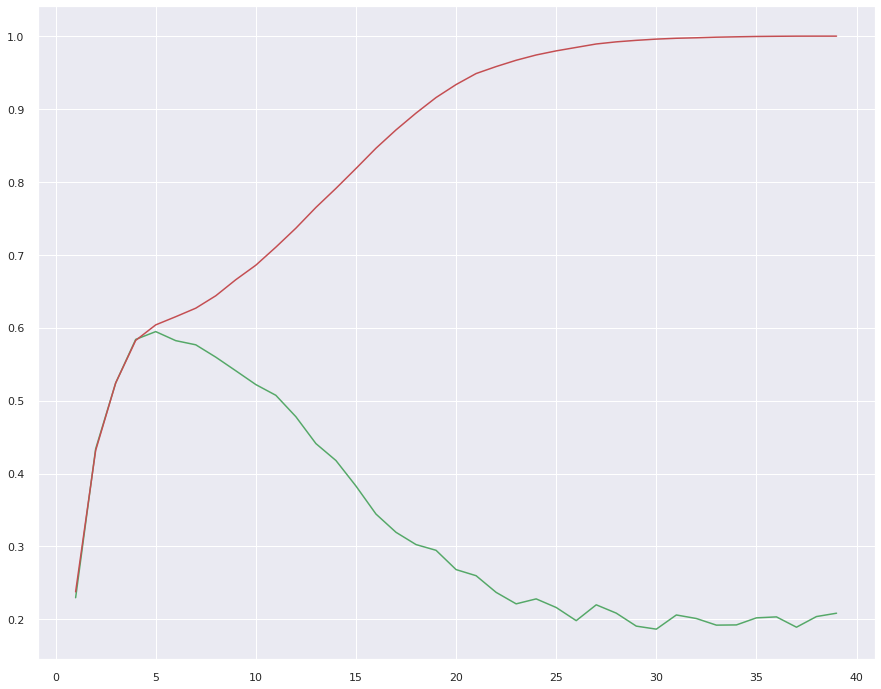

In [80]:
plt.plot(depth_array, test_r2, c='g');
plt.plot(depth_array, train_r2, c='r');

Based on the above plot, depth 5 seems to yiled the best results for DecisionTree based model.
Beyond this depth the Variance of the model starts increasin and bias as well.

In [81]:
#Tuned DecReg

tuned_regtree = DecisionTreeRegressor(random_state=42, max_depth=5)
tuned_regtree.fit(X_train_processed, y_train)

model_eval('TunedRegTree', False, tuned_regtree, X_train_processed, X_test_processed, y_train, y_test)

TunedRegTree: 

 Train (R^2) : 0.6039335724587842
 Test  (R^2) : 0.5947071437341445

 Train RMSE : 1082.6546302299298
 Test  RMSE : 1057.4468238865643


#### 5. Bagging Tree

In [82]:
bagtree = BaggingRegressor(random_state=42)
bagtree.fit(X_train_processed, y_train)

model_eval('StdBaggingTree', False, bagtree, X_train_processed, X_test_processed, y_train, y_test)

StdBaggingTree: 

 Train (R^2) : 0.9191319041195624
 Test  (R^2) : 0.5278157664363886

 Train RMSE : 489.20910423617596
 Test  RMSE : 1141.3788048068864


#### 6. Random Forest

In [83]:
rf = RandomForestRegressor(random_state=42, n_jobs=20)
rf.fit(X_train_processed, y_train)

model_eval('StdRandomForest', False, rf, X_train_processed, X_test_processed, y_train, y_test)

StdRandomForest: 

 Train (R^2) : 0.9382162368735445
 Test  (R^2) : 0.5571554729576234

 Train RMSE : 427.6053206307266
 Test  RMSE : 1105.349714859237


In [84]:
# Tunning RandomForest on max_dpth, min_sample_split
rf_tuned = RandomForestRegressor(max_depth=6, random_state=42, n_jobs=50, min_samples_split=140, min_samples_leaf = 8)
rf_tuned.fit(X_train_processed, y_train)

model_eval('TunedRandomForst', False, rf_tuned, X_train_processed, X_test_processed, y_train, y_test)
get_parameters(rf_tuned)

TunedRandomForst: 

 Train (R^2) : 0.6127857156357673
 Test  (R^2) : 0.6054127430738727

 Train RMSE : 1070.4875163848935
 Test  RMSE : 1043.3874064397721

Parameters:

 max_depth : 6
 min_samples_split : 140
 n_estimators : 100
 n_jobs : 50
 min_samples_leaf : 8
 max_samples : None


In [85]:
#Models R^2 and RMSE Comparison

model_eval('StdLinearReg', False, lr, X_train_processed, X_test_processed, y_train, y_test)
print('\n')
model_eval('StdBaggingTree', False, bagtree, X_train_processed, X_test_processed, y_train, y_test)
print('\n')
model_eval('TunedRegTree', False, tuned_regtree, X_train_processed, X_test_processed, y_train, y_test)
print('\n')
model_eval('TunedRandomForst', False, rf_tuned, X_train_processed, X_test_processed, y_train, y_test)


StdLinearReg: 

 Train (R^2) : 0.5615510441399849
 Test  (R^2) : 0.5670955370464611

 Train RMSE : 1139.109416853199
 Test  RMSE : 1092.8740005503614


StdBaggingTree: 

 Train (R^2) : 0.9191319041195624
 Test  (R^2) : 0.5278157664363886

 Train RMSE : 489.20910423617596
 Test  RMSE : 1141.3788048068864


TunedRegTree: 

 Train (R^2) : 0.6039335724587842
 Test  (R^2) : 0.5947071437341445

 Train RMSE : 1082.6546302299298
 Test  RMSE : 1057.4468238865643


TunedRandomForst: 

 Train (R^2) : 0.6127857156357673
 Test  (R^2) : 0.6054127430738727

 Train RMSE : 1070.4875163848935
 Test  RMSE : 1043.3874064397721


## ScratchPad

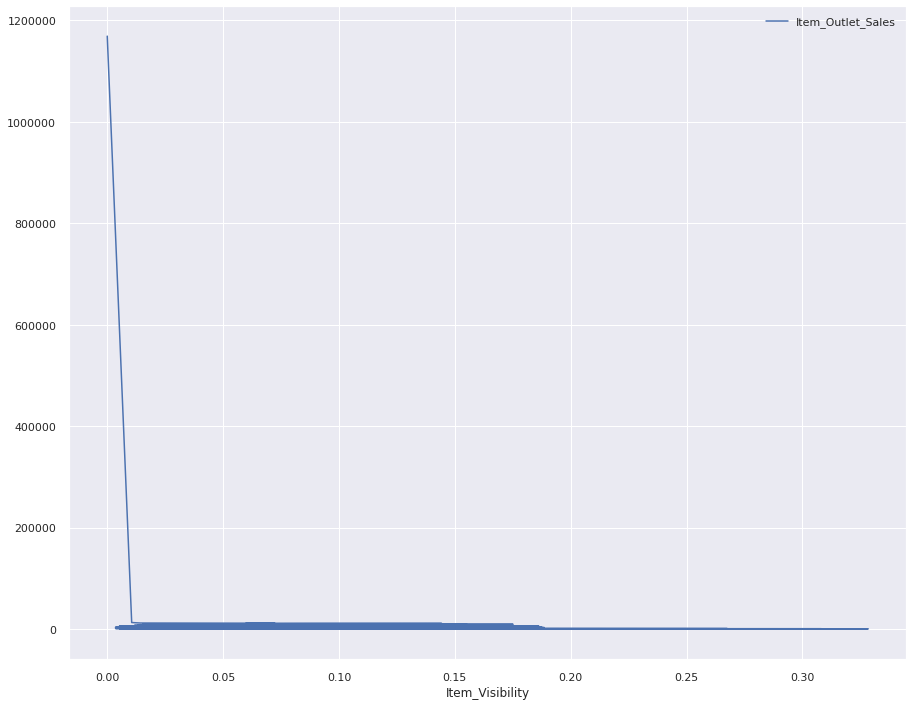

In [86]:
itemSalesByVisibility = df[['Item_Outlet_Sales']].groupby([df['Item_Visibility']]).sum()
itemSalesByVisibility
#Item Total Sales by Visibility
itemSalesByVisibility.sort_values(by='Item_Outlet_Sales',inplace=True)
itemSalesByVisibility.plot()
plt.ticklabel_format(style='plain',axis='y')

In [87]:
typeTotalItemSales = df['Item_Outlet_Sales'].groupby([df['Item_Type']]).sum().reset_index(name='Type_Total_Sales')
typeTotalItemSales
outletTotalSales = df['Item_Outlet_Sales'].groupby(df['Outlet_Identifier']).sum().reset_index(name='Outlet_Total_Sales')
outletTotalSales

,Outlet_Identifier,Outlet_Total_Sales
0,OUT010,188340.17240
1,OUT013,2142663.57820
2,OUT017,2167465.29400
3,OUT018,1851822.83000
4,OUT019,179694.09360
5,OUT027,3453926.05140
6,OUT035,2268122.93540
7,OUT045,2036725.47700
8,OUT046,2118395.16820
9,OUT049,2183969.81020


In [88]:
visibilityTotalItemSales = df['Item_Outlet_Sales'].groupby([df['Item_Visibility']]).sum().reset_index(name='Visibility_Total_Sales')
visibilityTotalItemSales

,Item_Visibility,Visibility_Total_Sales
0,0.00000,1169057.58020
1,0.00357,3229.79580
2,0.00359,1691.79780
3,0.00360,2922.19620
4,0.00360,3075.99600
...,...,...
7875,0.30939,138.48640
7876,0.31109,154.46560
7877,0.32112,199.74000
7878,0.32578,761.00940


Text(0.5, 1.0, 'Total Sales by Outlet')

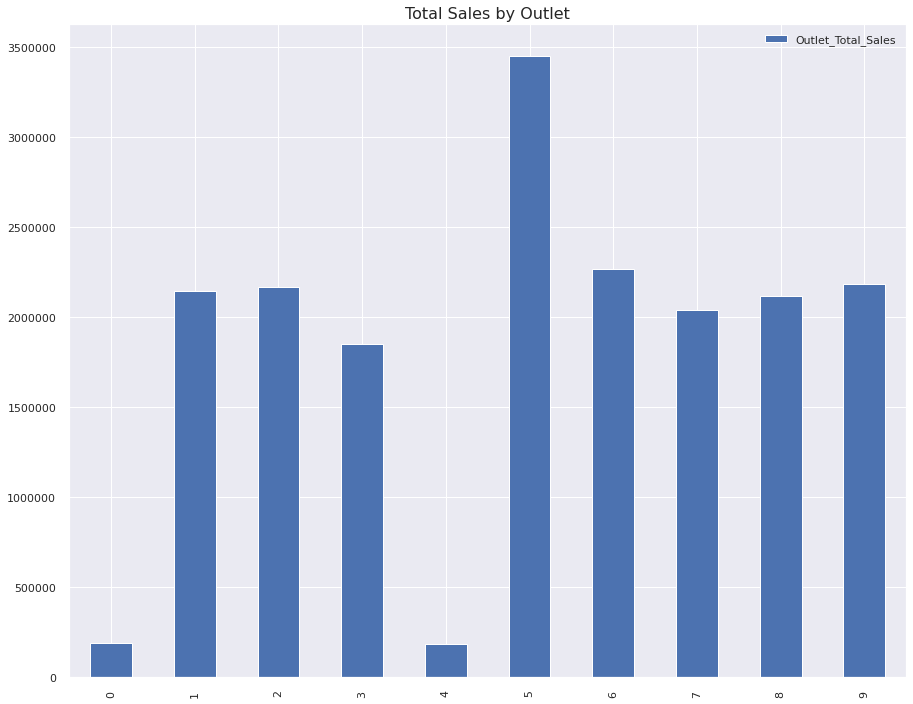

In [89]:
#Item Total Sales by Outlet
outletTotalSales.plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Total Sales by Outlet',fontsize=16)

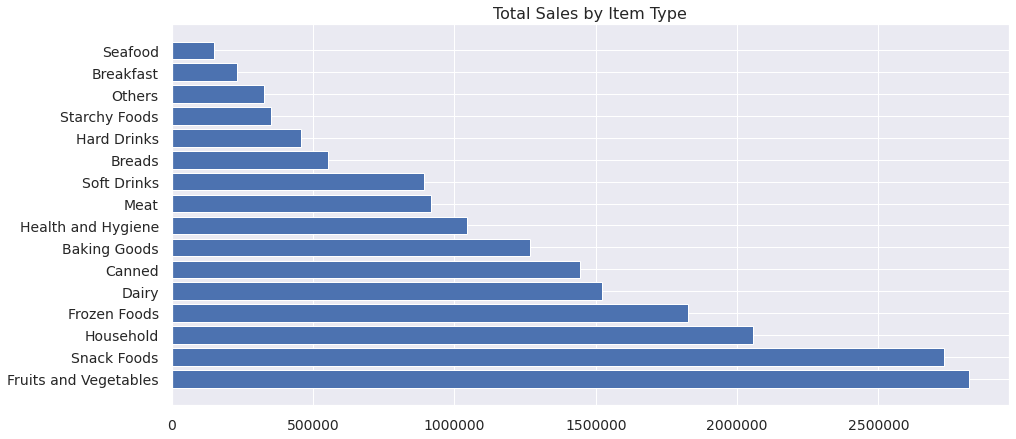

In [90]:
# #totalSalesByType.plot(kind='bar')
plt.figure(figsize=(15,7))
plt.barh(totalSalesByType['Item_Type'],totalSalesByType['Item_Outlet_Sales'])
plt.ticklabel_format(style='plain',axis='x')
plt.title('Total Sales by Item Type',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

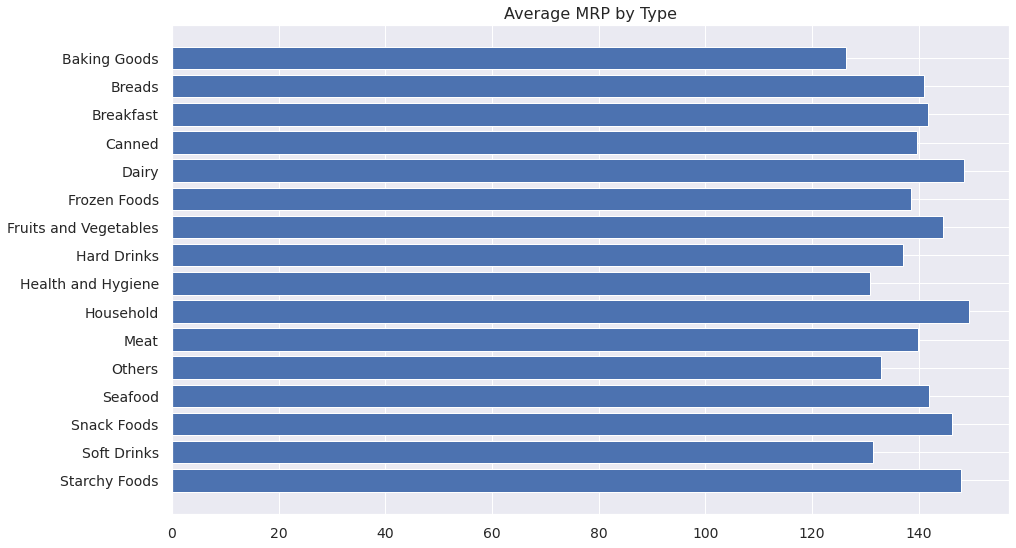

In [91]:
plt.figure(figsize=(15,9))
plt.barh(avgMRPByType['Item_Type'],avgMRPByType['Avg_MRP']);
plt.title('Average MRP by Type',fontsize=16);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

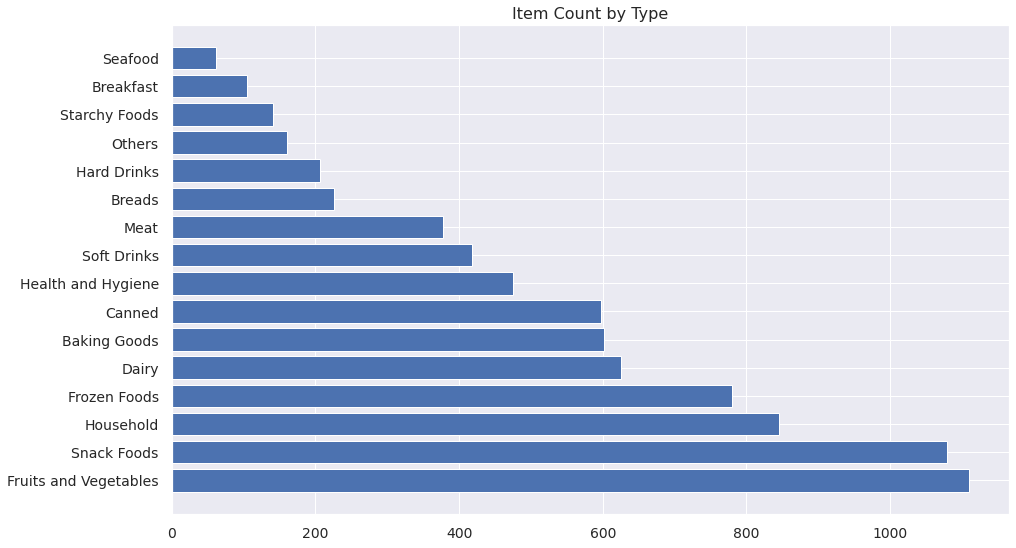

In [92]:
countByType.sort_values(by='Item_Count',inplace=True,ascending=False)
plt.figure(figsize=(15,9))
plt.barh(countByType['Item_Type'],countByType['Item_Count']);
#plt.xticks(rotation=90);
plt.title('Item Count by Type',fontsize=16);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

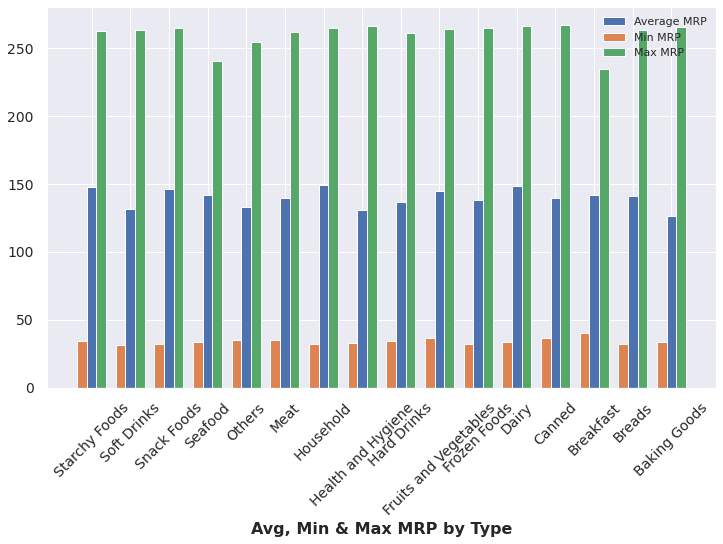

In [93]:
plt.figure(figsize=(12,7))

barWidth = 0.25
maxMRPByType = df.groupby(df['Item_Type'])['Item_MRP'].max().reset_index(name='Max_MRP')
maxMRPByType.sort_values(by='Item_Type',inplace=True,ascending=False)
minMRPByType = df.groupby(df['Item_Type'])['Item_MRP'].min().reset_index(name='Min_MRP')
minMRPByType.sort_values(by='Item_Type',inplace=True,ascending=False)

r1 = np.arange(len(avgMRPByType))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r2, avgMRPByType['Avg_MRP'], width=barWidth, edgecolor = 'white', label = 'Average MRP');
plt.bar(r1, minMRPByType['Min_MRP'], width=barWidth, edgecolor = 'white', label = 'Min MRP');
plt.bar(r3, maxMRPByType['Max_MRP'], width=barWidth, edgecolor = 'white', label = 'Max MRP');

plt.xlabel('Avg, Min & Max MRP by Type', fontweight='bold',fontsize=16);
plt.xticks([r + barWidth for r in range(len(avgMRPByType))], avgMRPByType['Item_Type']);
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
#plt.ylabel('Count of Countries', fontweight='bold');

plt.legend();

#Source: https://www.python-graph-gallery.com/11-grouped-barplot